In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df = pd.read_excel('../input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [3]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [4]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [5]:
df['STATUS'].value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

In [6]:
kerosene = []
gasoline = []
lpg = []
thinner = []

dic = {1: 7, 2: 12, 3: 14, 4:16, 5:20, 6:1, 7:2}

for index, row in df.iterrows():
    if(row['FUEL']) == 'kerosene':
      kerosene.append(dic.get(row['SIZE']))
      gasoline.append(0)
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'gasoline':
      kerosene.append(0)
      gasoline.append(dic.get(row['SIZE']))
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'thinner':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(0)
      thinner.append(dic.get(row['SIZE']))
    if(row['FUEL']) == 'lpg':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(dic.get(row['SIZE']))
      thinner.append(0)

In [7]:
df['KEROSENE'] = kerosene
df['GASOLINE'] = gasoline
df['THINNER'] = thinner
df['LPG'] = lpg
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
0,1,gasoline,10,96,0.0,75,0,0,7,0,0
1,1,gasoline,10,96,0.0,72,1,0,7,0,0
2,1,gasoline,10,96,2.6,70,1,0,7,0,0
3,1,gasoline,10,96,3.2,68,1,0,7,0,0
4,1,gasoline,10,109,4.5,67,1,0,7,0,0


In [8]:
df = df.drop(['FUEL'], axis=1)
df = df.drop(['SIZE'], axis=1)
df.head()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
0,10,96,0.0,75,0,0,7,0,0
1,10,96,0.0,72,1,0,7,0,0
2,10,96,2.6,70,1,0,7,0,0
3,10,96,3.2,68,1,0,7,0,0
4,10,109,4.5,67,1,0,7,0,0


In [9]:
df['GASOLINE'].value_counts()

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: GASOLINE, dtype: int64

In [10]:
df['THINNER'].value_counts()

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: THINNER, dtype: int64

In [11]:
df['LPG'].value_counts()

0    15390
1     1026
2     1026
Name: LPG, dtype: int64

In [12]:
df['KEROSENE'].value_counts()

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: KEROSENE, dtype: int64

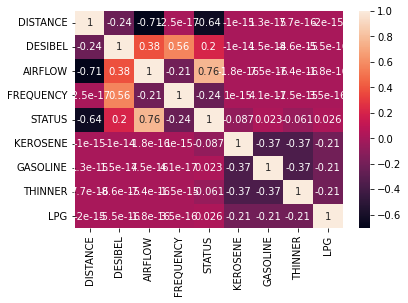

In [13]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
feature = df.drop(['STATUS'], axis=1)
target = df['STATUS']


x, X_test, y, y_test = train_test_split(feature, target, shuffle = True, test_size=0.2, random_state=1)
X_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [15]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1814, 1: 1675}

In [16]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 5211, 1: 5253}

In [17]:
unique, counts = np.unique(y_cv, return_counts=True)
dict(zip(unique, counts))

{0: 1734, 1: 1755}

In [18]:
model = keras.Sequential(
    [
      layers.Dense(128, input_shape=(8,), activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1,   activation='sigmoid')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


2022-10-08 01:30:36.327679: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=200,
                    epochs=450,
                    validation_data=(X_test, y_test),
                    shuffle=True)

2022-10-08 01:30:36.571421: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/450
53/53 [==============================] - 1s 9ms/step - loss: 0.4293 - accuracy: 0.8096 - val_loss: 0.2860 - val_accuracy: 0.8727
Epoch 2/450
53/53 [==============================] - 0s 4ms/step - loss: 0.2619 - accuracy: 0.8830 - val_loss: 0.2398 - val_accuracy: 0.8922
Epoch 3/450
53/53 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.8987 - val_loss: 0.2118 - val_accuracy: 0.9057
Epoch 4/450
53/53 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9116 - val_loss: 0.1933 - val_accuracy: 0.9154
Epoch 5/450
53/53 [==============================] - 0s 4ms/step - loss: 0.1878 - accuracy: 0.9203 - val_loss: 0.1826 - val_accuracy: 0.9189
Epoch 6/450
53/53 [==============================] - 0s 4ms/step - loss: 0.1707 - accuracy: 0.9277 - val_loss: 0.1860 - val_accuracy: 0.9195
Epoch 7/450
53/53 [==============================] - 0s 4ms/step - loss: 0.1637 - accuracy: 0.9304 - val_loss: 0.1681 - val_accuracy: 0.9258
Epoch 8/450
5

In [20]:
score = model.evaluate(x_cv, y_cv, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11425181478261948
Test accuracy: 0.9621667861938477


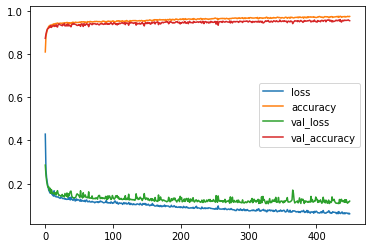

In [21]:
lossdf=pd.DataFrame(history.history)
lossdf.plot()
plt.show()

In [22]:
ypred=model.predict(x_cv)
ypred=ypred>0.5
accuracy_score(y_cv,ypred)

0.9621668099742047

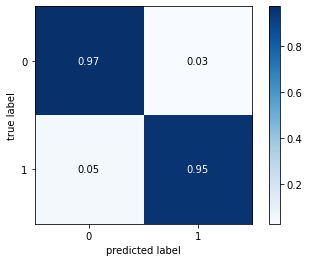

In [23]:
cm = metrics.confusion_matrix(y_cv, (ypred>0.5))

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()